## Spotify 

Import the libreries and modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV 

In [2]:
csv_file = '../data/spotify_dataset.csv'
df = pd.read_csv(csv_file, sep=',', encoding='latin-1')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### CSV Analysis 

We use this method to get a quick overview of the structure and data types of our DataFrame, allowing us to quickly identify potential data quality issues, such as missing values or inconsistencies in data types. This information helps us make informed decisions about data cleaning and transformation, thus ensuring the reliability of our downstream analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We have a data set with 114000 records and 21 columns. 

In [4]:
df.shape

(114000, 21)

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Column descriptions:

- **track_id**: Unique identifier for each music track.

- **artists**: List of artists associated with the track.

- **album_name**: Name of the album to which the track belongs.

- **track_name**: Name of the music track.

- **popularity**: Popularity score of the track based on playback and trends.

- **duration_ms**: Track duration in milliseconds.

- **explicit**: Boolean indicator showing if the track contains explicit content (1 if explicit, 0 if not).

- **danceability**: Measure of the track's ability to be suitable for dancing, according to various musical elements.

- **energy**: Represents the perceived intensity and activity of the track.

- **key**: Fundamental pitch of the track in terms of musical tones (e.g., C, D, E, etc.).

- **loudness**: Average volume level of the track in decibels (dB).

- **mode**: Track mode (higher or lower).

- **speechiness**: Measure of the presence of spoken words in the track (e.g. podcasts).

- **acousticness**: Measure of the presence of acoustic elements in the track, where 1.0 represents a high probability that the track is acoustic.

- **instrumentalness**: Measure of the presence of instrumental elements in the track, where 1.0 indicates a high probability that the track is instrumental.

- **liveness**: Measure of the presence of a live audience in the recording of the track.

- **valence**: Represents the perceived positivity or happiness of the track.

- **tempo**: General musical rhythm of the track in beats per minute (BPM).

- **time_signature**: Number of beats per musical measure in the track.

- **track_genre'**: Musical genre associated with the music track, if available in the data.




### NUll Values 
Calculate the number of null values in each column of the DataFrame

In [6]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Most of the columns have complete data for all tracks, but there is one row with missing data in the artist, album name and track name columns.

We check which row contains these null values. 

In [7]:
df[df.isna().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Transformation Eliminate Null Values

Since only one row of the 114,000 has null values in important columns, removing this row will have minimal impact on the overall size and representativeness of the data set.

In [8]:
df = df.drop(df[df['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index, axis=0)

We verify that no null value is found. 

In [9]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Unique Values 

We verify which unique values our data set contains 

In [10]:
df.nunique()

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

### Duplicates 

We check for duplicate values, but at the moment there are no duplicate values.

In [11]:
df[df.duplicated()].head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


When we eliminate the 'Unnamed: 0' column, because it is not significant for the analysis, we can see that there are duplicate values. 

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df[df.duplicated()].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,çªç ´å£ / èªæ ¢ã«ãªããã,çªç ´å£,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


#### Duplicates by ID 

Verifying that we have 24,259 duplicate values in our dataset highlights the critical importance of addressing data cleaning and management appropriately. This is critical to ensure the reliability and accuracy of our downstream analyses. The presence of a significant amount of duplicates highlights the need to take steps to eliminate these redundant records and ensure that we are working with unique and consistent data in our analysis and decision making processes.

In [14]:
df.duplicated(subset=['track_id']).sum()

24259

##### Number of duplicates per ID 

We know the number of duplicates identified by the 'track_id' field. Now we want to drill down to get more information about these duplicate values.

In [15]:
track_id_counts = df['track_id'].value_counts()


table_data = pd.DataFrame({'track_id': track_id_counts.index, 'Number of Occurrences': track_id_counts.values})

table_data.head(5)

,track_id,Number of Occurrences
0,6S3JlDAGk3uu3NtZbPnuhS,9
1,2Ey6v4Sekh3Z0RUSISRosD,8
2,2kkvB3RNRzwjFdGhaUA0tz,8
3,08kTa3SL9sV6Iy8KLKtGql,7
4,4XYieGKSlJlHpzB3bl6WMP,7


### Songs that have more than one genre 

When examining a duplicate value, we notice that the only difference lies in the 'track_genre' field, where the song is associated with more than one musical genre.

In [16]:
track_id_duplicated_row = "5SuOikwiRyPMVoIQDJUgSV"
df.query(f'track_id == "{track_id_duplicated_row}"')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,j-pop
99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,singer-songwriter
102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4,songwriter


We know how many songs have more than one genre. 

In [17]:
genre_counts = df.groupby('track_id')['track_genre'].apply(lambda x: len(set(x)))

filtered_track_ids = genre_counts[genre_counts > 1].index

print("Number of songs with more than one genre:", len(filtered_track_ids))

Number of songs with more than one genre: 16299


### Transformation Delete duplicate songs

To resolve duplicate values in the dataset, we chose to retain only the first occurrence of each 'track_id'.

In [18]:
df = df.drop_duplicates(subset="track_id", keep='first', inplace=False)
df.shape

(89740, 20)

In total, our dataset consisted of 89740 records.

## Artist 

We continue with the analysis of the artists column.

In [19]:
df['artists'].unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

We note that some artist names contain multiple names separated by semicolons ';' in the dataset.

In [20]:
df_filtered = df[df['artists'].str.contains(';')]
df_filtered.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.827,0.000004,0.1250,0.4140,110.154,4,acoustic


### Secondary artist and artist number transformations 

We perform some transformations for the artists column:

 - **Split Artists into Lists:** a new column called 'split_artists' is created where each value in the 'artists' column is split using the ; delimiter.

 - **Count Number of Artists per Track:** An additional column called 'num_artists' is added containing the number of artists associated with each track.

 - **Second Artist Extraction (if any):** Another column called 'secondary_artist' is added that captures the second artist in each artist list, if there is more than one artist associated with the track.


In [21]:
df['split_artists'] = df['artists'].str.split(';')
df['num_artists'] = df['split_artists'].apply(len)
df['secondary_artist'] = df['split_artists'].apply(lambda x: x[1] if len(x) > 1 else None)

In cases where the values do not contain the name of the second artist, we add "No second artist" to prevent them from being interpreted as null values.

In [22]:
df['secondary_artist'] = df['secondary_artist'].fillna('No second artist')

We can observe that some songs have more than two artists, and there are even cases where a song has more than 20 participating artists.

In [23]:
df['num_artists'].unique()

array([ 1,  2,  3,  4,  5, 10,  7,  6, 18, 11,  8, 17,  9, 15, 14, 19, 12,
       31, 13, 26, 23, 30, 20, 22, 32, 38], dtype=int64)

A notable example is a song that features the collaboration of 38 artists.

In [24]:
df[df['num_artists'] == 38]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,split_artists,num_artists,secondary_artist
104241,7F5rc8a0xD6DCloB2kROq9,Aitana;Alejandro Sanz;Antonio JosÃ©;Antonio Or...,Himno A La AlegrÃ­a,Himno A La AlegrÃ­a,66,307473,False,0.304,0.328,2,...,0.56,0.0,0.116,0.243,119.675,4,spanish,"[Aitana, Alejandro Sanz, Antonio JosÃ©, Antoni...",38,Alejandro Sanz


### Transformation popularity 

The 'popularity' column shows a variety of values ranging from 0 to 100, indicating different levels of popularity for the songs in the dataset.

In [25]:
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94], dtype=int64)

To obtain a clearer visualization of the information provided by the 'popularity' column, we categorize these values as follows:

- Values in the interval from 0 to 33 will be labeled as 'Low'.
- Values in the interval from 33 to 66 will be labeled as 'Medium'.
- Values in the range 66 to 100 will be labeled as 'High'.

In [26]:
bins = [0, 33, 66, 100]  

labels = ['Low', 'Medium', 'High']

df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)

df[['popularity', 'popularity_category']].head()

,popularity,popularity_category
0,73,High
1,55,Medium
2,57,Medium
3,71,High
4,82,High


### Gender 

In the 'track_genre' column, we find that there are a total of 113 different genres.

In [27]:
df['track_genre'].nunique()

113

Each genre contains a large number of songs in the dataset.

In [28]:
df.groupby(['track_genre']).size().reset_index(name='cnt').head()

,track_genre,cnt
0,acoustic,1000
1,afrobeat,999
2,alt-rock,999
3,alternative,407
4,ambient,999


### Transformation gender categorization

To get a better view of the distribution of genres in the songs, we performed a categorization of music genres where we grouped and kept only 9 main genres.

In [29]:
music_genres = {
    "Pop": ["pop", "pop-film", "j-pop", "k-pop", "latino", "latin", "party", "dance", "disco", "club", "trance", "techno", "synth-pop", "reggaeton", "reggae", "hip-hop", "r-n-b", "rap", "edm", "electronic", "dancehall", "dubstep", "dub", "disco", "dance", "club", "comedy", "happy"],
    "Rock": ["rock", "psych-rock", "punk-rock", "rock-n-roll", "rockabilly", "indie", "indie-pop", "alt-rock", "metalcore", "metal", "heavy-metal", "hard-rock", "hardcore", "grunge", "goth", "grunge", "garage", "emo"],
    "Acoustic": ["acoustic", "singer-songwriter", "songwriter", "sad", "romance", "folk", "country", "blues", "ballad"],
    "World": ["world-music", "tango", "samba", "salsa", "sertanejo", "samba", "pagode", "forro", "flamenco", "cantopop", "mandopop"],
    "Instrumental": ["classical", "piano", "jazz", "instrumental", "ambient", "new-age", "opera", "orchestral"],
    "Experimental": ["experimental", "alternative", "avant-garde", "noise", "industrial", "idm", "glitch", "drone"],
    "Ethnic": ["african", "iranian", "turkish", "swedish", "spanish", "french", "german", "celtic", "indian", "malay"],
    "Children": ["kids", "children", "disney", "animation", "cartoon"]
}

def assign_genre(genre, music_genres):
    for category, keywords in music_genres.items():
        if any(keyword in genre for keyword in keywords):
            return category
    return 'Other'

In [30]:
df['genre_category'] = df['track_genre'].apply(lambda x: assign_genre(x, music_genres))

We check the number of genres contained in our dataset

In [31]:
df['genre_category'].nunique()

9

After reviewing the data set, we proceed to eliminate the following columns that do not contribute to the final objective

In [32]:
df = df.drop(columns=['split_artists', 'track_id'])

In [33]:
df.shape

(89740, 23)

### Total transformations 

1. **Deletion of a specific row**:
   A row was deleted from the DataFrame where the value of 'track_id' was equal to '1kR4gIb7nGxHPI3D2ifs59'.

2. **Duplicate removal**:
   Duplicate rows based on the 'track_id' column were removed, retaining only the first occurrence of each 'track_id'.

3. **Splitting the 'artists'** column:
   Split the 'artists' column, which contains artist names separated by ';', into a list of artist names using the ';' character as a separator.

4. **Count of artists per song**:
   A new column named 'num_artists' was created that counts the number of artists associated with each song.

5. **Extraction of the second artist**:
   The second artist was extracted from the 'split_artists' list and placed in a new column called 'secondary_artist'. If a song has only one artist, the value 'No second artist' was assigned to this column.

6. **Music genre category assignment**:
   A music genre category was assigned to each song using a custom function that maps specific music genres to broader categories.

7. **Popularity categorization**:
   The 'popularity' column was categorized based on predefined ranges ('Low', 'Medium', 'High') using bins defined by values 0-33, 33-66 and 66-100.

8. **Deletion of unneeded columns**:
   Columns that are not relevant to the final analysis were removed, including 'Unnamed: 0', 'split_artists' and 'track_id'.


After applying the transformations to the dataset, here is the general visualization of how it was structured.

In [34]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,num_artists,secondary_artist,popularity_category,genre_category
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.000001,0.3580,0.715,87.917,4,acoustic,1,No second artist,High,Acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.000006,0.1010,0.267,77.489,4,acoustic,1,No second artist,Medium,Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.000000,0.1170,0.120,76.332,4,acoustic,2,ZAYN,Medium,Acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.000071,0.1320,0.143,181.740,3,acoustic,1,No second artist,High,Acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.000000,0.0829,0.167,119.949,4,acoustic,1,No second artist,High,Acoustic


The graph shows that some artists are considerably more popular than others on Spotify. This may be due to differences in musical quality, promotional strategies, current trends in music genres, previous artistic legacy and distribution agreements. Taken together, these factors contribute to an uneven distribution in the play frequency of artists on the platform.

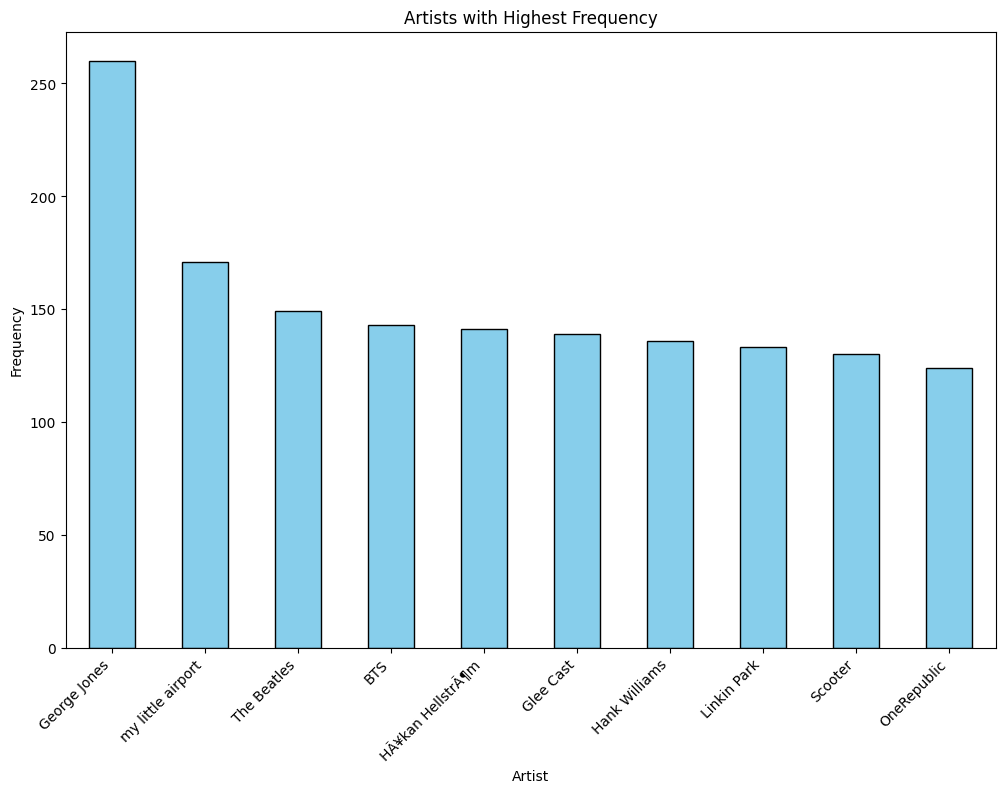

In [35]:
artist_frequency = df['artists'].value_counts()

top_artists = artist_frequency.head(10)

plt.figure(figsize=(12, 8))  
top_artists.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Artists with Highest Frequency')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


These albums represent a variety of genres and themes popular with Spotify users, from country music to Mozart classics to alternative Christmas music. The high frequency of these albums reflects listener preferences and the diversity of musical tastes on the platform.


In [36]:
album_frequency = df['album_name'].value_counts()

top_5_albums = album_frequency.head(5)
top_5_albums_df = pd.DataFrame({'Album': top_5_albums.index, 'Frequency': top_5_albums.values})


print("\nTable of the Top 5 Albums by Frequency:")
top_5_albums_df


Table of the Top 5 Albums by Frequency:


,Album,Frequency
0,The Complete Hank Williams,110
1,Greatest Hits,77
2,Mozart: A Night of Classics,75
3,Alternative Christmas 2022,73
4,Mozart - All Day Classics,68


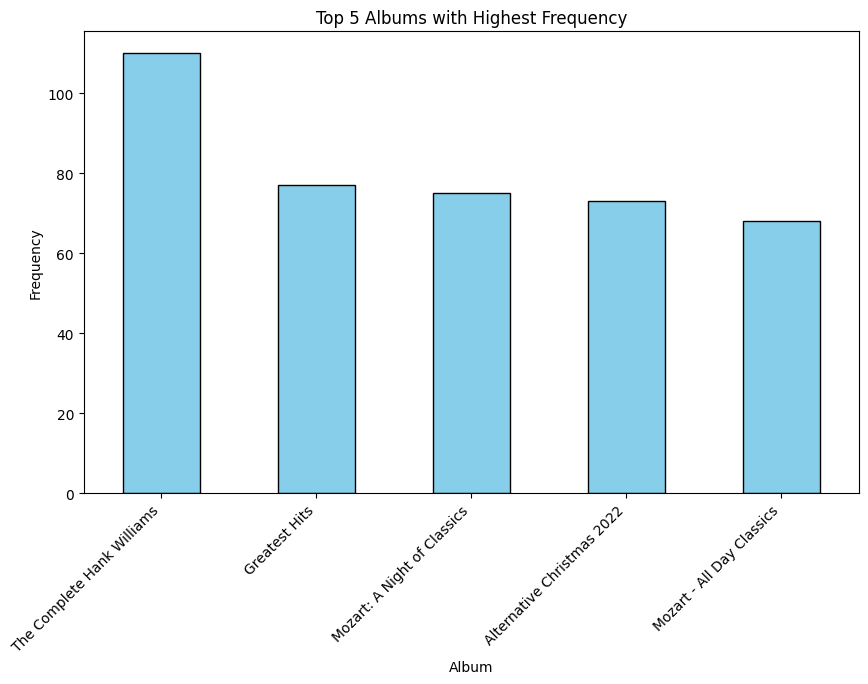

In [37]:
album_frequency = df['album_name'].value_counts()

top_5_albums = album_frequency.head(5)

plt.figure(figsize=(10, 6))  
top_5_albums.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Albums with Highest Frequency')
plt.xlabel('Album')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph showing the distribution of songs by number of artists reveals an interesting pattern in the music industry. The predominance of songs performed by one or two artists suggests that popular music tends to be created and performed by a relatively limited number of collaborators compared to larger ensembles. This phenomenon could be related to several factors. First, songs performed by solo artists or duos may be easier to produce and promote, which may lead to greater exposure and public acceptance. In addition, the trend toward fewer artists per song could reflect the preferences of listeners, who may be more inclined toward more intimate or minimalist musical styles.

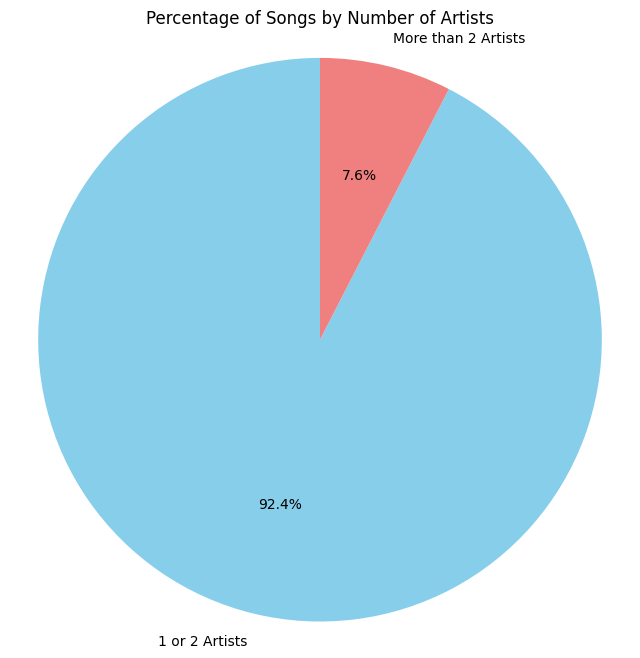

In [38]:
num_artists_1_2 = df[df['num_artists'].isin([1, 2])]
num_artists_more_than_2 = df[df['num_artists'] > 2]

total_songs = len(df)
percentage_1_2 = (len(num_artists_1_2) / total_songs) * 100
percentage_more_than_2 = (len(num_artists_more_than_2) / total_songs) * 100

percentages = [percentage_1_2, percentage_more_than_2]
labels = ['1 or 2 Artists', 'More than 2 Artists']
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))  
plt.pie(percentages, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Songs by Number of Artists')
plt.axis('equal')  
plt.show()

Analysis of the pie chart reveals that the majority of songs (91.4%) in the data set are not explicit, indicating that explicit content is relatively uncommon. However, approximately 8.6% of the songs are explicit, indicating a significant demand for this type of content among certain listeners.

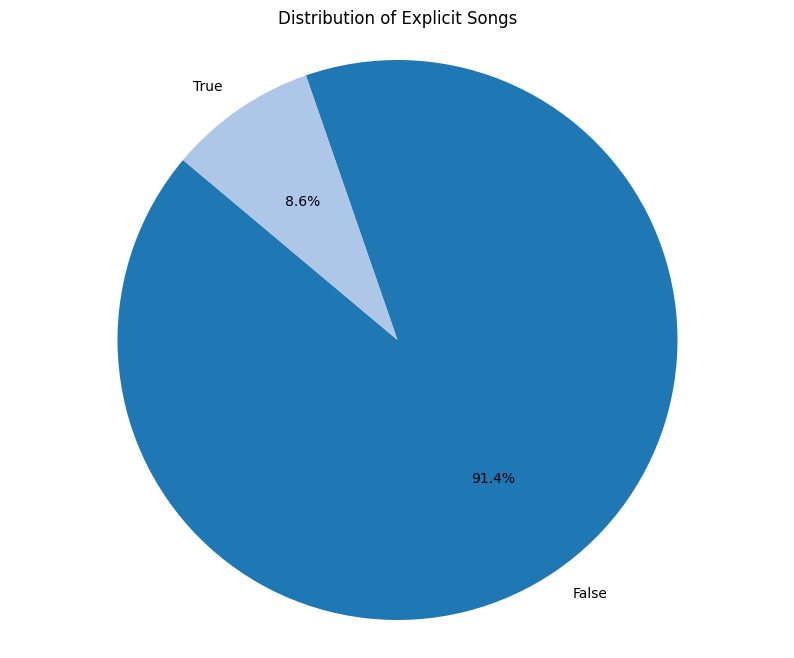

In [39]:
explicit_counts = df['explicit'].value_counts()
plt.figure(figsize=(10, 8))  
plt.pie(explicit_counts, labels=explicit_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Explicit Songs')
plt.axis('equal')  
plt.show()

Analysis of the graph indicates that the distribution of music genres on Spotify is diverse, with pop and rock standing out as the most popular, followed by a variety of other genres. Factors such as music trends, audience demographics, marketing and promotion strategies, and song availability can influence the popularity of music genres

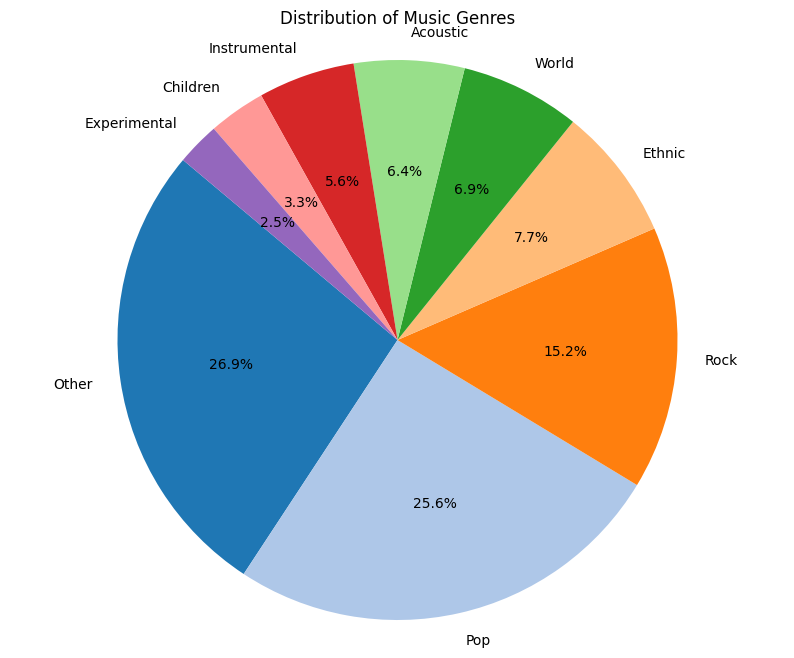

In [40]:
genre_counts = df['genre_category'].value_counts()
plt.figure(figsize=(10, 8))  
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Music Genres')
plt.axis('equal')  
plt.show()


Analysis of the graph reveals that the popularity of songs on Spotify is not uniform, with the majority of the songs placed in the medium popularity range. Only a minority of songs reach a high level of success or have a low number of plays. Several factors, including music genre, artist, novelty, playlists and marketing campaigns, can influence a song's popularity.

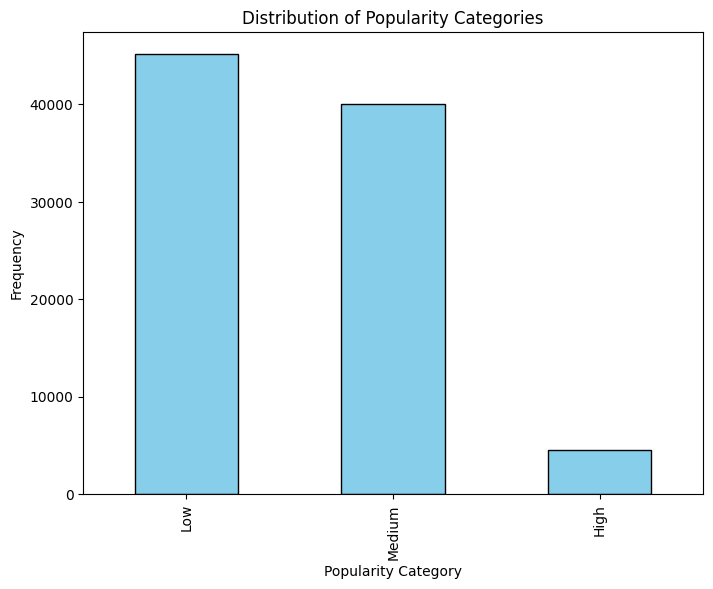

In [41]:
plt.figure(figsize=(8, 6))  
df['popularity_category'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Frequency')
plt.show()


In [42]:
df.to_csv('spotifynew.csv', index=False)